### Description

In this project we are going to recognize fraudulent credit card transactions so the customers are not charged for items that they did not purchase

The data can be downloaded from: https://www.kaggle.com/mlg-ulb/creditcardfraud

### 1. Library and packages

First we should load the python libraries and packages

In [23]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Pytorch

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [57]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Loading data

Next, we are going to load the dataset, which contains transactions mades by credit cards in september 2013 european cardholders

In [3]:
dataset = read_csv("creditcard.csv")

### 3. Data exploration

Here we will see the number of rows and columns, the type of variables that we are going to work, the number of different clases, if there are outliers and some descriptive analysis.

In [5]:
dataset.shape

(284807, 31)

In [9]:
set_option('display.width', 100)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
set_option('display.precision', 3)
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,...,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,284807.000,284807.000
mean,94813.860,1.168e-15,3.417e-16,-1.380e-15,2.074e-15,9.604e-16,1.487e-15,-5.556e-16,1.213e-16,-2.406e-15,...,1.654e-16,-3.569e-16,2.579e-16,4.473e-15,5.341e-16,1.683e-15,-3.660e-16,-1.227e-16,88.350,0.002
std,47488.146,1.959e+00,1.651e+00,1.516e+00,1.416e+00,1.380e+00,1.332e+00,1.237e+00,1.194e+00,1.099e+00,...,7.345e-01,7.257e-01,6.245e-01,6.056e-01,5.213e-01,4.822e-01,4.036e-01,3.301e-01,250.120,0.042
min,0.000,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-2.616e+01,-4.356e+01,-7.322e+01,-1.343e+01,...,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,0.000,0.000
25%,54201.500,-9.204e-01,-5.985e-01,-8.904e-01,-8.486e-01,-6.916e-01,-7.683e-01,-5.541e-01,-2.086e-01,-6.431e-01,...,-2.284e-01,-5.424e-01,-1.618e-01,-3.546e-01,-3.171e-01,-3.270e-01,-7.084e-02,-5.296e-02,5.600,0.000
50%,84692.000,1.811e-02,6.549e-02,1.798e-01,-1.985e-02,-5.434e-02,-2.742e-01,4.010e-02,2.236e-02,-5.143e-02,...,-2.945e-02,6.782e-03,-1.119e-02,4.098e-02,1.659e-02,-5.214e-02,1.342e-03,1.124e-02,22.000,0.000
75%,139320.500,1.316e+00,8.037e-01,1.027e+00,7.433e-01,6.119e-01,3.986e-01,5.704e-01,3.273e-01,5.971e-01,...,1.864e-01,5.286e-01,1.476e-01,4.395e-01,3.507e-01,2.410e-01,9.105e-02,7.828e-02,77.165,0.000
max,172792.000,2.455e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,7.330e+01,1.206e+02,2.001e+01,1.559e+01,...,2.720e+01,1.050e+01,2.253e+01,4.585e+00,7.520e+00,3.517e+00,3.161e+01,3.385e+01,25691.160,1.000


In [18]:
class_names = {0:'Not fraud',1:'Fraud'}
print(dataset.Class.value_counts().rename(index=class_names))

Not fraud    284315
Fraud           492
Name: Class, dtype: int64


In [46]:
print('Null Values =',dataset.isnull().values.any())

Null Values = False


there is not null or Nan values


#### 3.1 Data visualization


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


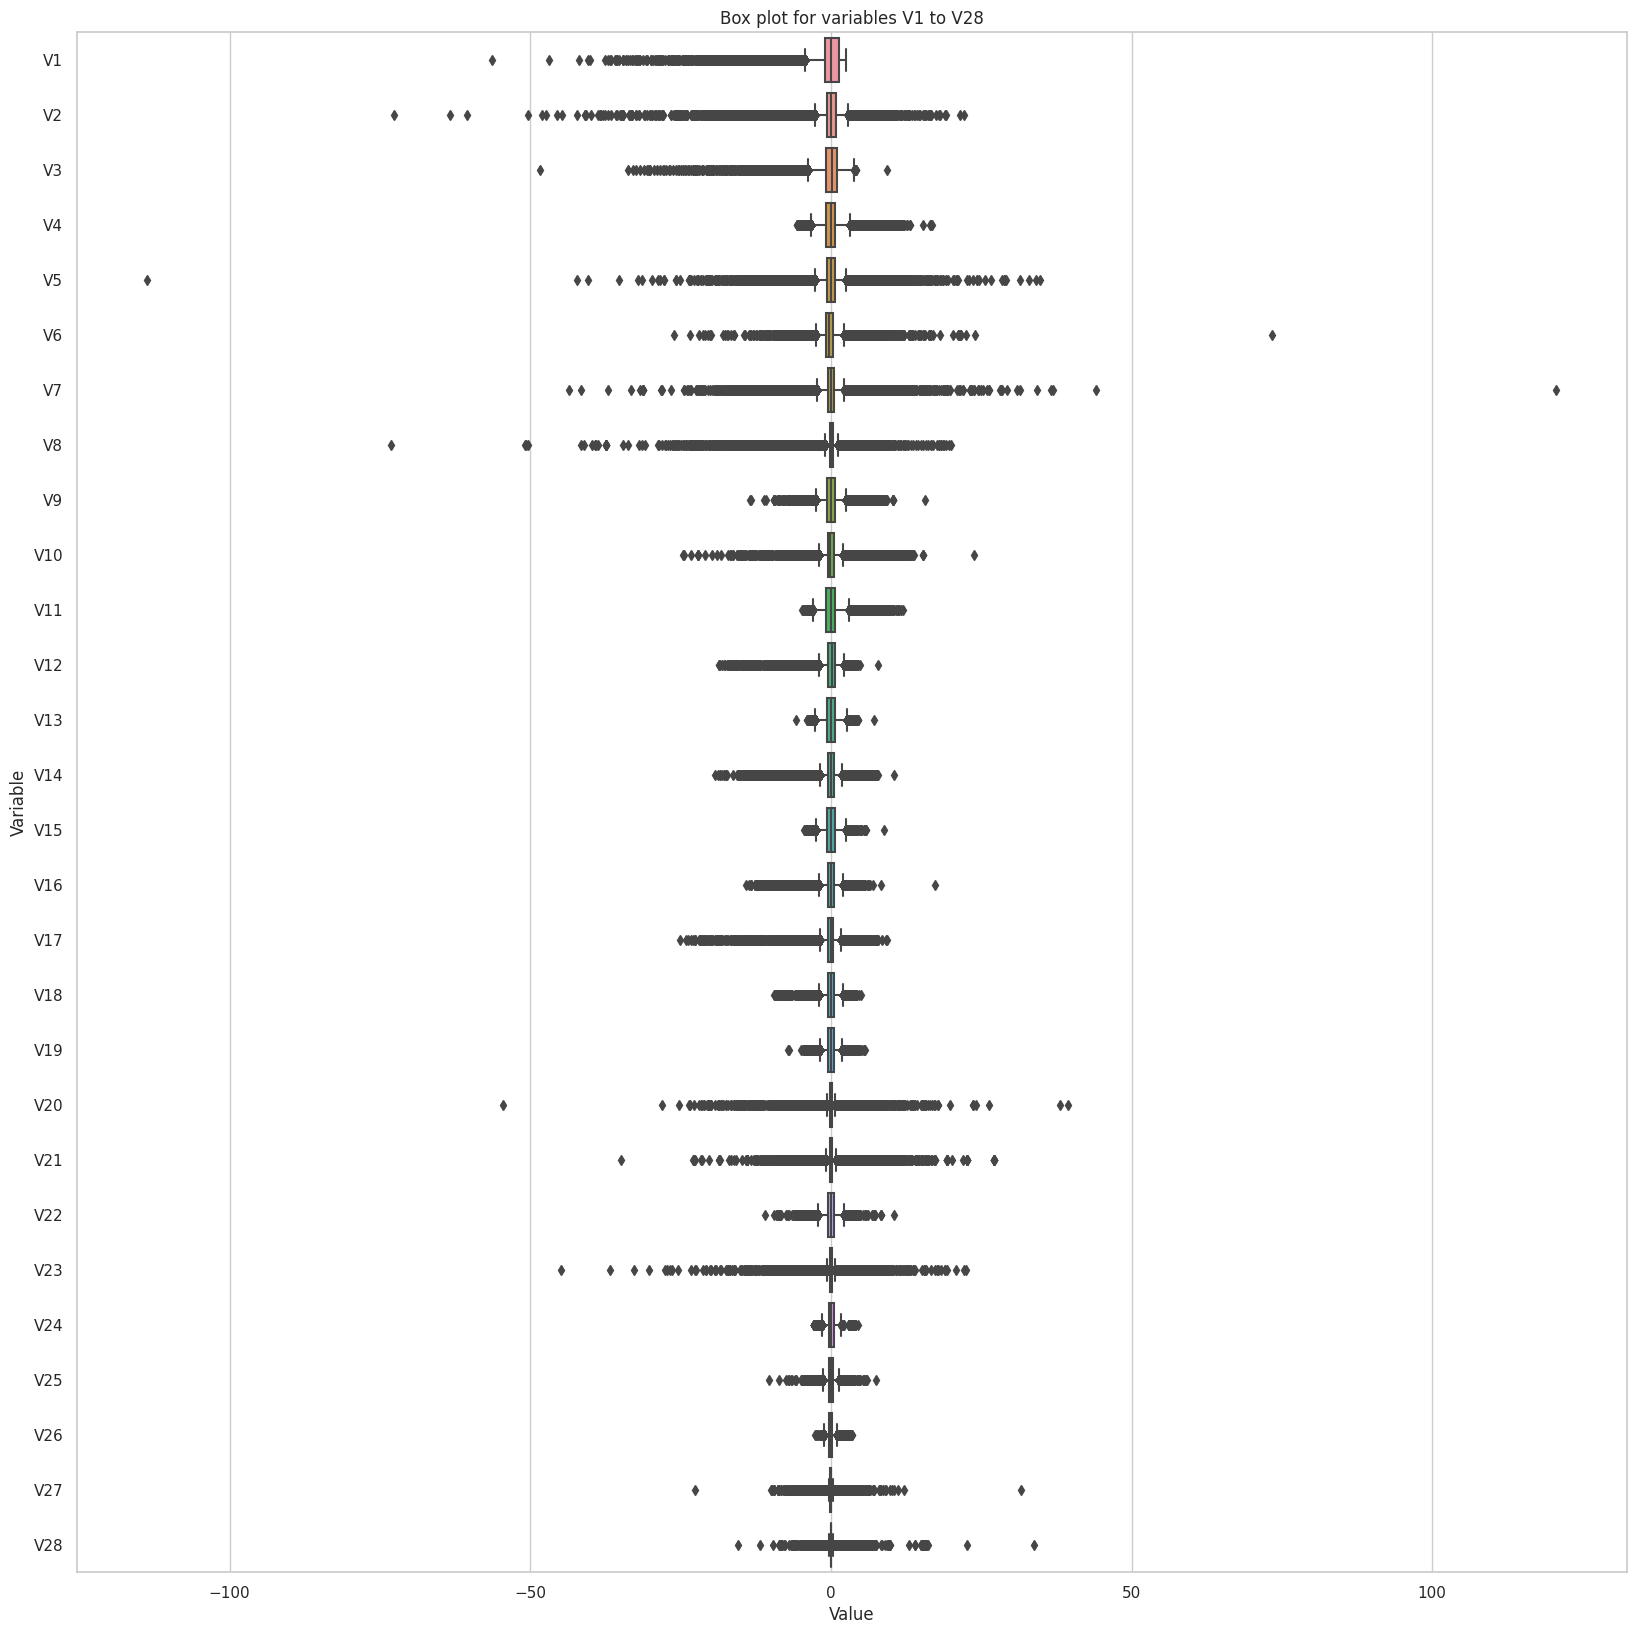

In [43]:
# Select V1 to V28 (inclusive)
selected_columns = dataset.iloc[:, 1:29]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots for each selected variable
plt.figure(figsize=(20, 20))  # Adjust the figure size if needed
sns.boxplot(data=selected_columns, orient="h")  # "orient='h'" for horizontal box plots
plt.title("Box plot for variables V1 to V28")
plt.xlabel("Value")
plt.ylabel("Variable")
plt.show()

I want to know if there is outliers, it appears that there is a lot of them, but we don't know anything about the variables V1 to V28 so is not obvius the decision of droping all the outliers, what I can do is compare the results of training with this dataset and a dataset modified without outliers.

In [44]:
# Select columns 1 to 29 (inclusive)
selected_columns = dataset.iloc[:, 1:29]

# Calculate the interquartile range (IQR) for each column
Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)
IQR = Q3 - Q1

# Count the values in each column that are far from the IQR
outliers_count = ((selected_columns < (Q1 - 1.5 * IQR)) | (selected_columns > (Q3 + 1.5 * IQR))).sum()

# Print the count of outliers for each column
print("Count of values far from the IQR for each column:")
print(outliers_count)


Count of values far from the IQR for each column:
V1      7062
V2     13526
V3      3363
V4     11148
V5     12295
V6     22965
V7      8948
V8     24134
V9      8283
V10     9496
V11      780
V12    15348
V13     3368
V14    14149
V15     2894
V16     8184
V17     7420
V18     7533
V19    10205
V20    27770
V21    14497
V22     1317
V23    18541
V24     4774
V25     5367
V26     5596
V27    39163
V28    30342
dtype: int64


### 4. Data preparation

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=10)
bestfeatures
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs      Score
17   V17  33979.169
14   V14  28695.548
12   V12  20749.822
10   V10  14057.980
16   V16  11443.349
3     V3  11014.508
7     V7  10349.605
11   V11   6999.355
4     V4   5163.832
18   V18   3584.381


### Training models and evaluate

In [51]:
# split out validation dataset for the end
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Further split the temporary data into validation and final test data (50% validation, 50% test)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=65)
scoring = 'accuracy'

# X_train and Y_train: Training data (used for model training)
# X_val and Y_val: Validation data (used for model evaluation and hyperparameter tuning, if needed)
# X_test and Y_test: Final test data (used for testing the final model)

I want to have the classic train/test split and a separate portion of my dataset to evaluate the final model

In [53]:
# test options for classification
num_folds = 10
seed = 7

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [58]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998907 (0.000099)
LDA: 0.999350 (0.000149)
KNN: 0.998332 (0.000310)
CART: 0.999153 (0.000183)


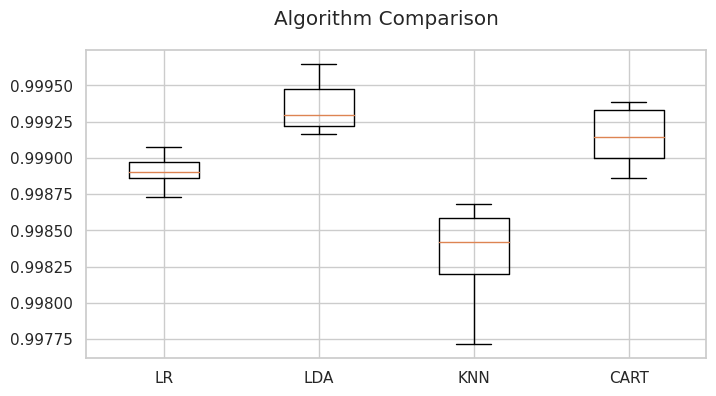

In [59]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [62]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_val
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9990168884519505
[[28415    14]
 [   14    38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28429
           1       0.73      0.73      0.73        52

    accuracy                           1.00     28481
   macro avg       0.87      0.87      0.87     28481
weighted avg       1.00      1.00      1.00     28481



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

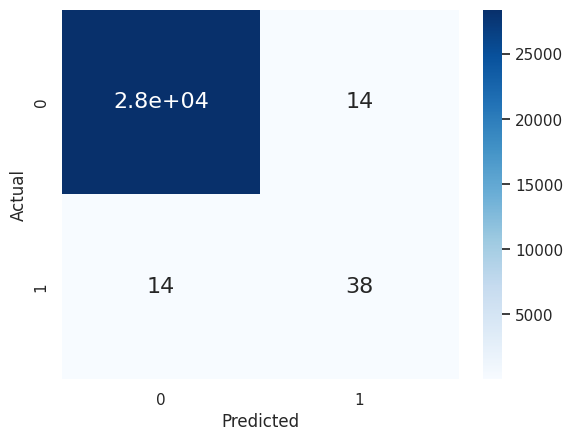

In [64]:
df_cm = pd.DataFrame(confusion_matrix(Y_val, predictions), columns=np.unique(Y_val), index = np.unique(Y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size